<a href="https://colab.research.google.com/github/mdforhadcse/Data-Science-project/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exploratory Data Analysis
exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

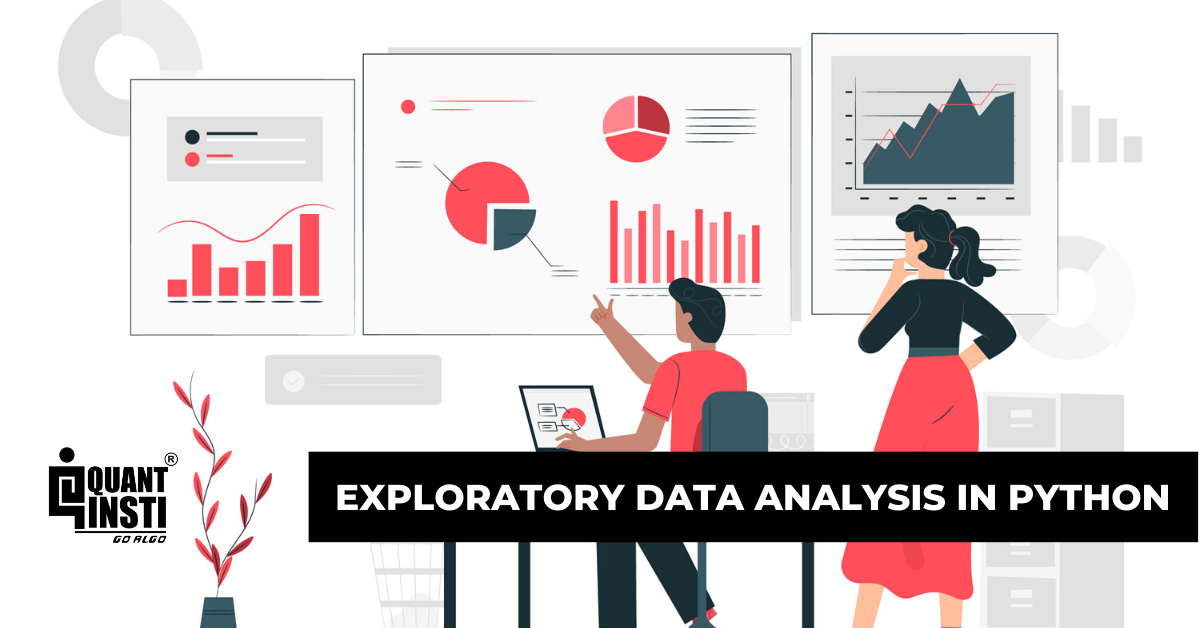












The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

Data scientists can use exploratory analysis to ensure the results they produce are valid and applicable to any desired business outcomes and goals. EDA also helps stakeholders by confirming they are asking the right questions. EDA can help answer questions about standard deviations, categorical variables, and confidence intervals. Once EDA is complete and insights are drawn, its features can then be used for more sophisticated data analysis or modeling, including machine learning.

We use 1958 to 2016 weather dataset for Dhaka by bangladesh abohawa odhidoptor
Variable description for this dataset,


*   YEAR- Observation year
*   Month- Month
*   MaxTemp- Mean Maximum temperature per month (Unit-Celsius)
*   MinTemp- Mean Minimum temperature per month (Unit-Celsius)
*   RelativeHumidity- Mean RelativeHumidity per month (Unit-%)
*   Rainfall- Total Rainfall per month (Unit-mm)


##Load the dataset

In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import numpy as np

url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-dhaka-weather1953-2016.csv'
df = pd.read_csv(url)
df.head()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
0,1953,1,26.7,10.9,70,10.0
1,1953,2,33.6,14.7,65,2.0
2,1953,3,37.5,21.7,73,90.0
3,1953,4,37.7,23.4,69,90.0
4,1953,5,34.7,24.2,81,274.0


##Checking Null Value

In [2]:
df.isnull().values.any()

False

##Description of the dataset

In [3]:
df.describe()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,1984.500000,6.500000,33.438529,21.51875,75.207031,168.377214
std,18.484992,3.454302,2.964510,4.97461,8.593081,173.784463
min,1953.000000,1.000000,24.300000,9.50000,49.000000,0.000000
25%,1968.750000,3.750000,31.875000,17.15000,69.000000,13.000000
50%,1984.500000,6.500000,33.900000,23.70000,76.000000,121.000000
75%,2000.250000,9.250000,35.525000,25.80000,83.000000,273.250000
max,2016.000000,12.000000,40.800000,28.10000,90.000000,856.000000


##Correlation

In [4]:
df.corr()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
YEAR,1.000000,0.000000,0.044080,0.098500,-0.165042,-0.009006
Month,0.000000,1.000000,-0.134986,0.210387,0.481070,0.125966
MaxTemp,0.044080,-0.134986,1.000000,0.724186,0.097398,0.365135
MinTemp,0.098500,0.210387,0.724186,1.000000,0.624770,0.687317
RelativeHumidity,-0.165042,0.481070,0.097398,0.624770,1.000000,0.708577
Rainfall,-0.009006,0.125966,0.365135,0.687317,0.708577,1.000000


##Heat map

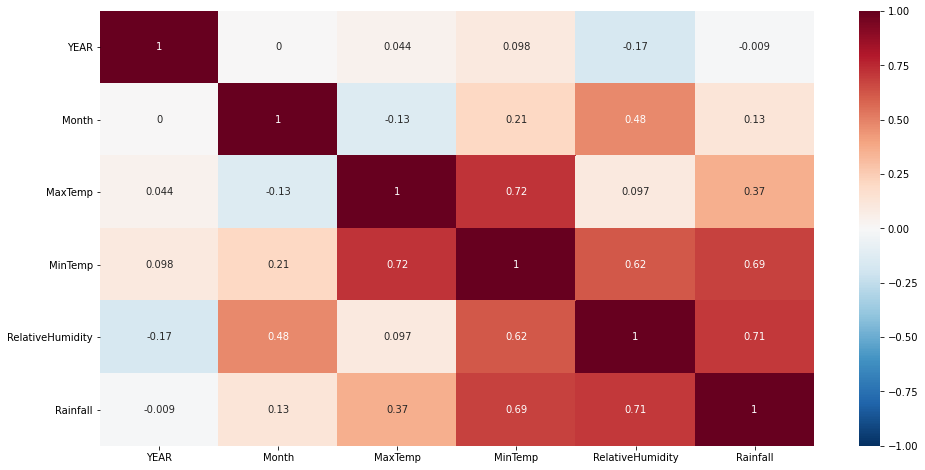

In [10]:
correlation = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

##Month wise Mean Rainfall

In [11]:
rain=df.groupby('Month')['Rainfall'].mean()
rain

Month
1       6.781250
2      19.703125
3      54.307812
4     126.431250
5     271.131250
6     360.075000
7     382.076563
8     313.971875
9     284.639063
10    164.120312
11     28.017187
12      9.271875
Name: Rainfall, dtype: float64

##Distribution plot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


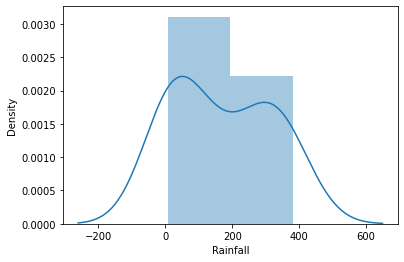

In [12]:
sns.distplot(rain)

##Maximum Rainfall month

In [13]:
df.groupby('Month')['Rainfall'].mean().sort_values(ascending=False)

Month
7     382.076563
6     360.075000
8     313.971875
9     284.639063
5     271.131250
10    164.120312
4     126.431250
3      54.307812
11     28.017187
2      19.703125
12      9.271875
1       6.781250
Name: Rainfall, dtype: float64

##Box plot of whole dataset

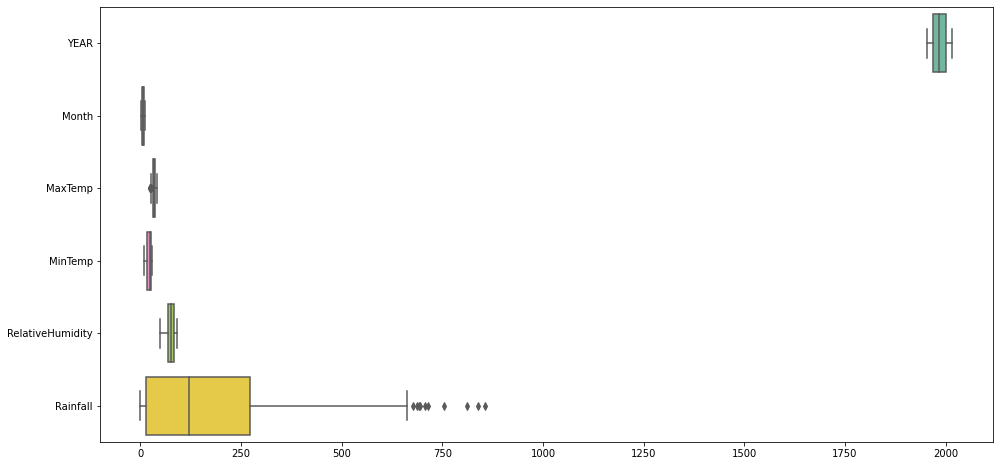

In [15]:
plt.figure(figsize=(16, 8))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

##Box plot of specific variable

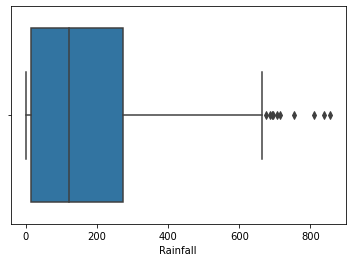

In [16]:
ax = sns.boxplot(x=df["Rainfall"])

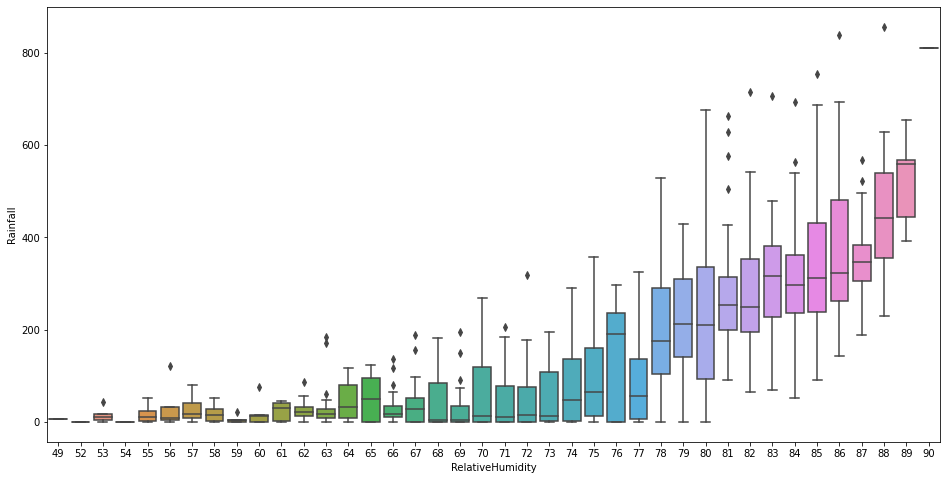

In [17]:
plt.figure(figsize=(16, 8))
ax = sns.boxplot(x="RelativeHumidity", y="Rainfall", data=df)

##Categorical box plot

<Figure size 1152x576 with 0 Axes>

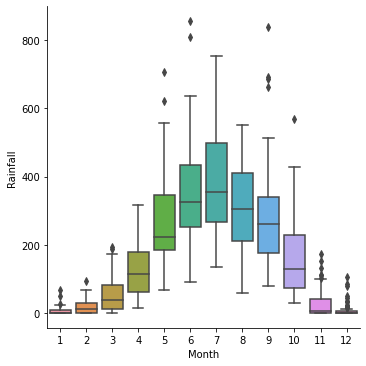

In [18]:
plt.figure(figsize=(16, 8))
ax=sns.catplot(x="Month", y="Rainfall", kind="box", data=df);

##Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4b604c518>,
      dtype=object)

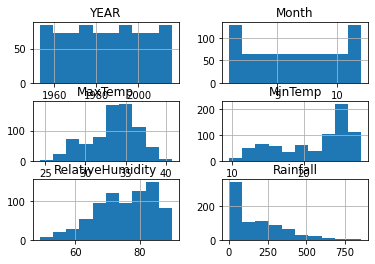

In [19]:
df.hist()

##Pairplot

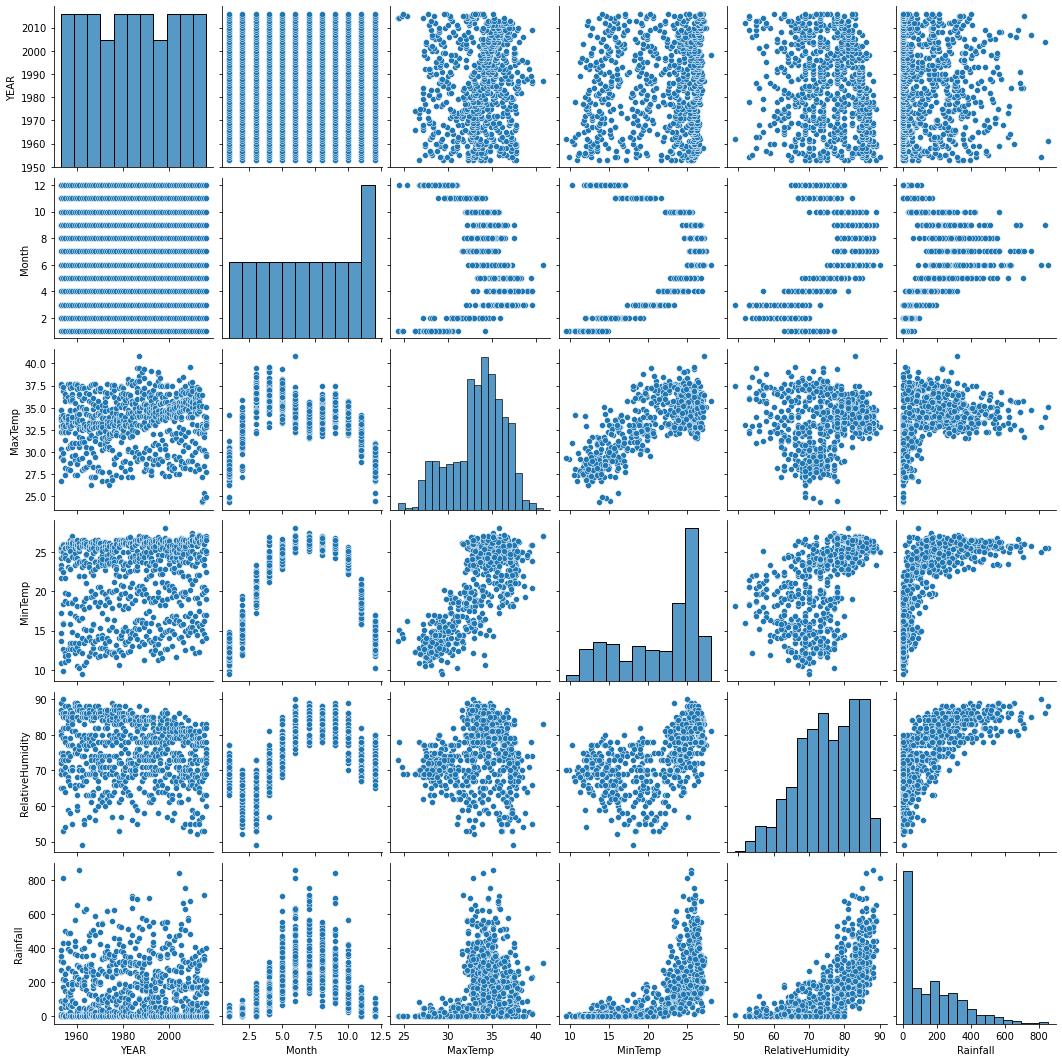

In [20]:
sns.pairplot(df)

##scatter plot

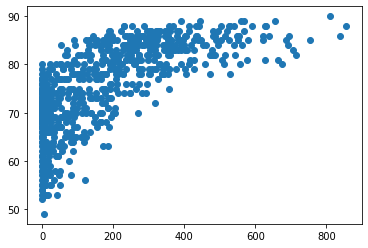

In [21]:
plt.scatter(df.Rainfall,df.RelativeHumidity)

##Jointplot

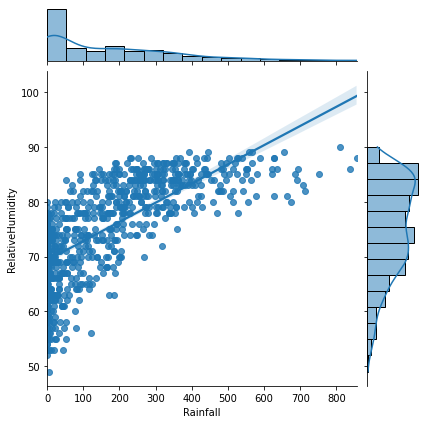

In [22]:
sns.jointplot(x="Rainfall", y="RelativeHumidity", data=df, kind="reg");

##Time series plot

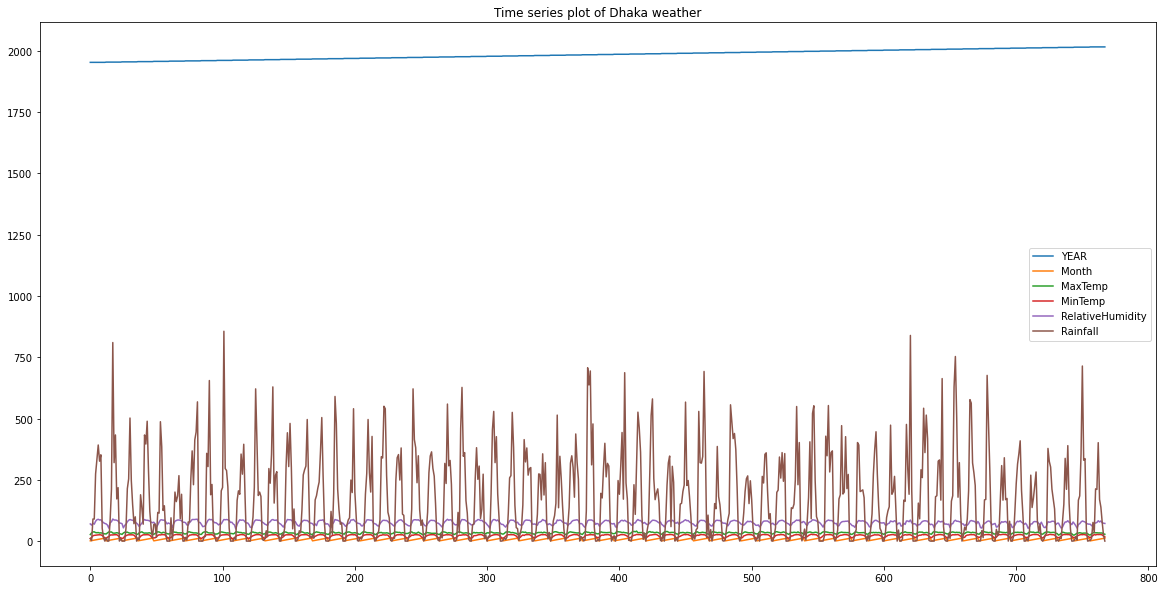

In [23]:
import matplotlib.pyplot as plt

df.plot(figsize=(20,10))
plt.title("Time series plot of Dhaka weather")
plt.show()

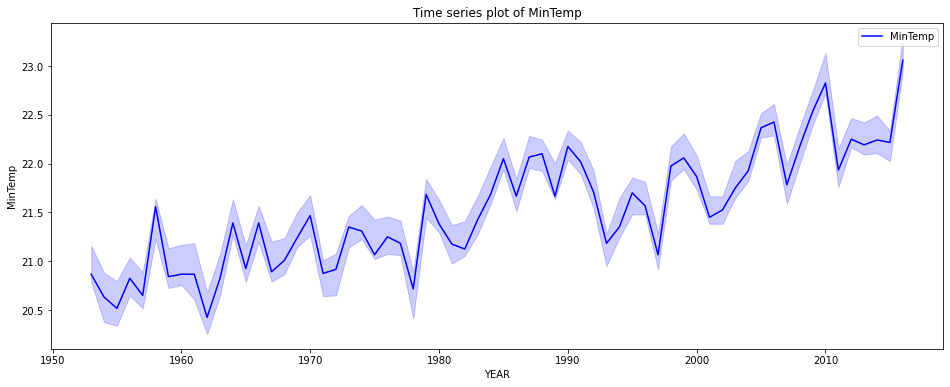

In [24]:
plt.figure(figsize=(16, 6))
plt.title('Time series plot of MinTemp')
ax = sns.lineplot(x="YEAR", y="MinTemp",ci=10,color="blue", label="MinTemp",data=df)

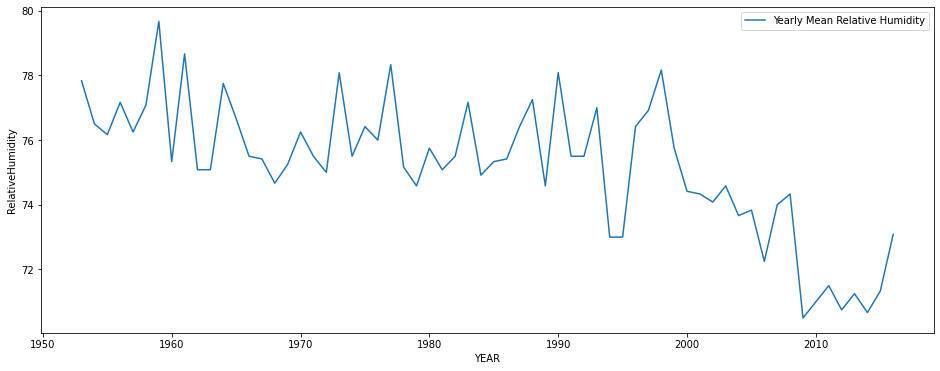

In [25]:
rh=df.groupby('YEAR')['RelativeHumidity'].mean()
plt.figure(figsize=(16, 6))
ax = sns.lineplot( label="Yearly Mean Relative Humidity",data=rh)